In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
customers = pd.read_csv(r'/Users/manjunathmaktal/Desktop/untitled folder/Customers.csv')
products = pd.read_csv(r'/Users/manjunathmaktal/Desktop/untitled folder/Products.csv')
transactions = pd.read_csv(r'/Users/manjunathmaktal/Desktop/untitled folder/Transactions.csv')
customers


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [2]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [3]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [4]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [5]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [29]:

transaction_summary = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",      # Total spending
    "Quantity": "sum",        # Total quantity purchased
    "ProductID": "nunique"    # Product diversity
}).rename(columns={"ProductID": "ProductDiversity"}).reset_index()
merged_data = customers.merge(transaction_summary, on="CustomerID", how="left")
merged_data

,CustomerID,CustomerName,Region,SignupDate,TotalValue,Quantity,ProductDiversity
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,12.0,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,10.0,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,14.0,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,23.0,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,7.0,3.0
...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4982.88,12.0,3.0
196,C0197,Christina Harvey,Europe,2023-03-21,1928.65,9.0,3.0
197,C0198,Rebecca Ray,Europe,2022-02-27,931.83,3.0,2.0
198,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,9.0,4.0


In [31]:
from sklearn.preprocessing import MinMaxScaler
merged_data.fillna(0, inplace=True)
features = ["TotalValue", "Quantity", "ProductDiversity"]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(merged_data[features])


In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data["Cluster"] = kmeans.fit_predict(normalized_features)

In [35]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(normalized_features, merged_data["Cluster"])
print("Davis-Bouldin Index:", db_index)

Davis-Bouldin Index: 0.7849440812454963


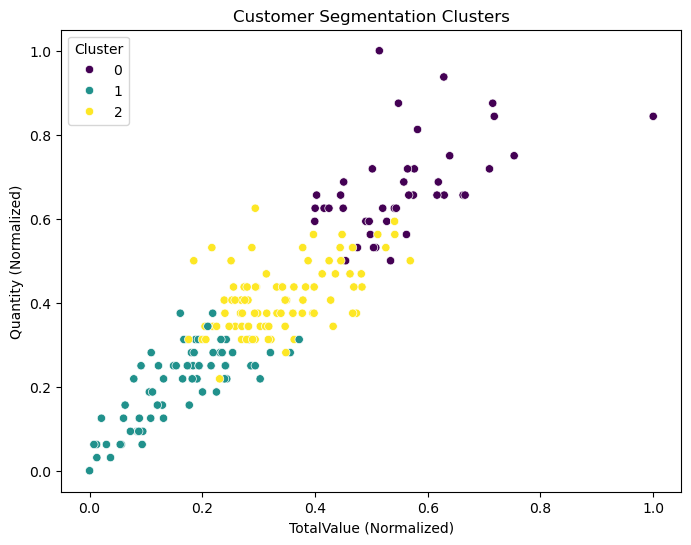

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=normalized_features[:, 0],
    y=normalized_features[:, 1],
    hue=merged_data["Cluster"],
    palette="viridis"
)
plt.title("Customer Segmentation Clusters")
plt.xlabel("TotalValue (Normalized)")
plt.ylabel("Quantity (Normalized)")
plt.legend(title="Cluster")
plt.show()
